In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from modules.data import simulate_advection
from modules.models import AdvectionDiffusionPinn
from modules.plots import plot_advection_model, plot_training_loss, plot_pointwise_error

2022-11-14 17:31:16.437681: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [15]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [16]:
v = 1.0
k = 0.5
def f_u(x):
    r = v / k
    return (1 - tf.exp(r * x)) / (1 - tf.exp(r))

In [17]:
(x_eqn, y_eqn), (x_bnd, u_bnd) = simulate_advection(n_samples=1000)
u_exact = f_u(x_eqn)

In [23]:
network = AdvectionDiffusionPinn.build_network(layers= [32, 64])
model = AdvectionDiffusionPinn(network, v=v, k=k)
model.compile()
optimizer = tf.keras.optimizers.Adam(learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(1e-3, decay_steps=1000, decay_rate=0.5))

In [24]:
inputs = tf.stack([x_eqn, x_bnd], axis=0)
targets = tf.stack([u_bnd], axis=0)

In [25]:
history = model.fit(inputs, targets, u_exact=u_exact, optimizer=optimizer, epochs=5000, progress_interval=200)

Epoch: 0 Loss: 0.4057 Total Elapsed Time: 1.76
Epoch: 200 Loss: 0.1061 Total Elapsed Time: 8.19
Epoch: 400 Loss: 0.0568 Total Elapsed Time: 14.69
Epoch: 600 Loss: 0.0029 Total Elapsed Time: 21.13
Epoch: 800 Loss: 0.0022 Total Elapsed Time: 28.07
Epoch: 1000 Loss: 0.0017 Total Elapsed Time: 34.17
Epoch: 1200 Loss: 0.0013 Total Elapsed Time: 40.95
Epoch: 1400 Loss: 0.0011 Total Elapsed Time: 47.31
Epoch: 1600 Loss: 0.0009 Total Elapsed Time: 53.41
Epoch: 1800 Loss: 0.0007 Total Elapsed Time: 60.10
Epoch: 2000 Loss: 0.0006 Total Elapsed Time: 66.91
Epoch: 2200 Loss: 0.0005 Total Elapsed Time: 74.11
Epoch: 2400 Loss: 0.0005 Total Elapsed Time: 81.23
Epoch: 2600 Loss: 0.0004 Total Elapsed Time: 88.02
Epoch: 2800 Loss: 0.0004 Total Elapsed Time: 94.12
Epoch: 3000 Loss: 0.0003 Total Elapsed Time: 100.72
Epoch: 3200 Loss: 0.0003 Total Elapsed Time: 109.23
Epoch: 3400 Loss: 0.0003 Total Elapsed Time: 116.72
Epoch: 3600 Loss: 0.0002 Total Elapsed Time: 122.59
Epoch: 3800 Loss: 0.0002 Total Elaps

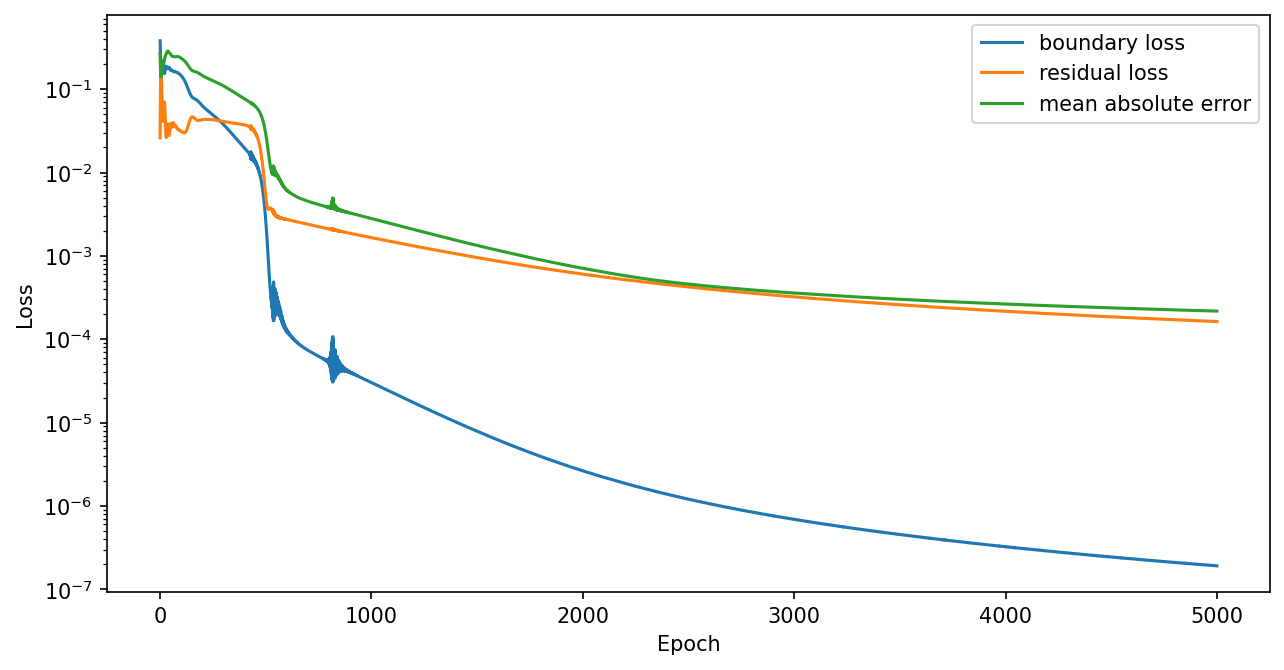

In [26]:
plot_training_loss(history, y_scale='log')

1/1 [==============================] - 0s 333ms/step


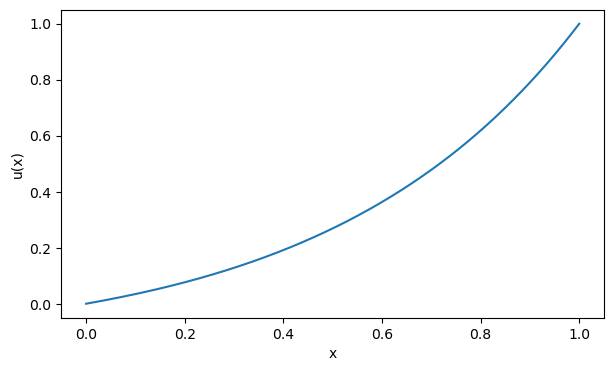

In [27]:
plot_advection_model(model.network)

In [47]:
x = np.linspace(0, 1, 1000, dtype=np.float32)[:, np.newaxis]

In [48]:
x.dtype

dtype('float32')

32/32 [==============================] - 0s 2ms/step


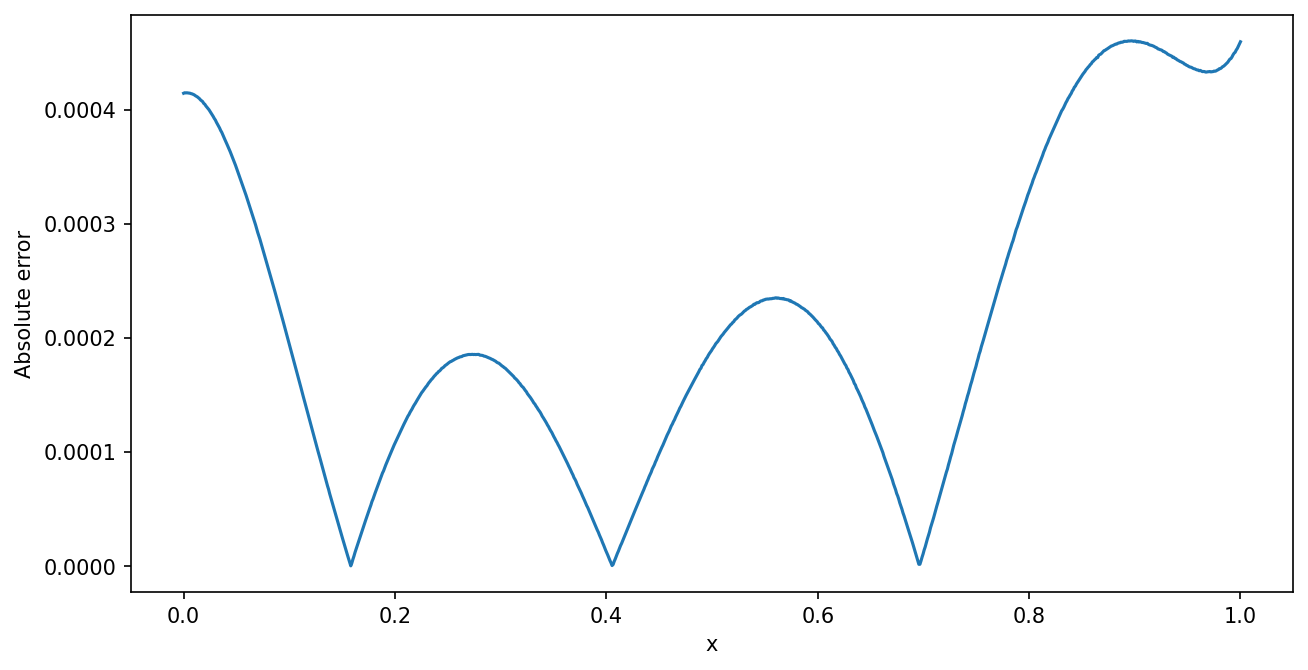

In [49]:
plot_pointwise_error(model.network.predict(x), f_u(x).numpy(), x)